In [211]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/Cyber Security Breaches.csv.xls')
df

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1051,1050,Puerto Rico Health Insurance,PR,American Health Inc,28413,9/20/2013,Theft,Other,2014-06-27,NaN,2013-09-20,NaN,2013
1051,1052,1051,"Hospitalists of Brandon, LLC",FL,"Doctors First Choice Billings, Inc.",1831,2/11/2014,Hacking/IT Incident,Other,2014-06-27,NaN,2014-02-11,NaN,2014
1052,1053,1052,Santa Rosa Memorial Hospital,CA,NaN,33702,6/2/2014,"Theft, Loss",Other Portable Electronic Device,2014-06-27,NaN,2014-06-02,NaN,2014
1053,1054,1053,Group Health Plan of Hurley Medical Center,MI,NaN,2289,5/13/2014,Unauthorized Access/Disclosure,E-mail,2014-06-27,NaN,2014-05-13,NaN,2014


In [212]:
df.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [213]:
df.describe()

,Unnamed: 0,Number,Individuals_Affected,year
count,1055.00000,1055.00000,1.055000e+03,1055.000000
mean,528.00000,527.00000,3.026202e+04,2011.450237
std,304.69657,304.69657,2.278598e+05,1.581780
min,1.00000,0.00000,5.000000e+02,1997.000000
25%,264.50000,263.50000,1.000000e+03,2010.000000
50%,528.00000,527.00000,2.300000e+03,2012.000000
75%,791.50000,790.50000,6.941000e+03,2013.000000
max,1055.00000,1054.00000,4.900000e+06,2014.000000


In [214]:
df.shape

(1055, 14)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        1055 non-null   int64 
 1   Number                            1055 non-null   int64 
 2   Name_of_Covered_Entity            1055 non-null   object
 3   State                             1055 non-null   object
 4   Business_Associate_Involved       271 non-null    object
 5   Individuals_Affected              1055 non-null   int64 
 6   Date_of_Breach                    1055 non-null   object
 7   Type_of_Breach                    1055 non-null   object
 8   Location_of_Breached_Information  1055 non-null   object
 9   Date_Posted_or_Updated            1055 non-null   object
 10  Summary                           142 non-null    object
 11  breach_start                      1055 non-null   object
 12  breach_end          

In [216]:
df.isnull().sum()

Unnamed: 0                            0
Number                                0
Name_of_Covered_Entity                0
State                                 0
Business_Associate_Involved         784
Individuals_Affected                  0
Date_of_Breach                        0
Type_of_Breach                        0
Location_of_Breached_Information      0
Date_Posted_or_Updated                0
Summary                             913
breach_start                          0
breach_end                          910
year                                  0
dtype: int64

In [217]:
# After dropping the nulls, it affected the df negatively b/c there's so many NaN
# Alternatively, I'll drop the columns 'Business_Associate_Involved, Summary, breach_end'

del df['Business_Associate_Involved']

In [218]:
del df['Summary']

In [219]:
del df['breach_end']

In [220]:
del df['Unnamed: 0']

In [221]:
del df['Number']

In [222]:
# All clean now!

df.isnull().sum()

Name_of_Covered_Entity              0
State                               0
Individuals_Affected                0
Date_of_Breach                      0
Type_of_Breach                      0
Location_of_Breached_Information    0
Date_Posted_or_Updated              0
breach_start                        0
year                                0
dtype: int64

In [223]:
df

,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,breach_start,year
0,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2014-06-30,2009-10-16,2009
1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2014-05-30,2009-09-22,2009
2,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,2009-10-12,2009
3,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2014-01-23,2009-10-09,2009
4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,2009-09-27,2009
...,...,...,...,...,...,...,...,...,...
1050,Puerto Rico Health Insurance,PR,28413,9/20/2013,Theft,Other,2014-06-27,2013-09-20,2013
1051,"Hospitalists of Brandon, LLC",FL,1831,2/11/2014,Hacking/IT Incident,Other,2014-06-27,2014-02-11,2014
1052,Santa Rosa Memorial Hospital,CA,33702,6/2/2014,"Theft, Loss",Other Portable Electronic Device,2014-06-27,2014-06-02,2014
1053,Group Health Plan of Hurley Medical Center,MI,2289,5/13/2014,Unauthorized Access/Disclosure,E-mail,2014-06-27,2014-05-13,2014


<AxesSubplot: >

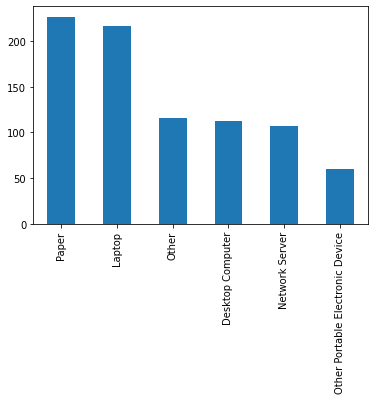

In [224]:
df['Location_of_Breached_Information'].value_counts()[:6].plot(kind = 'bar')

In [225]:
df['Location_of_Breached_Information'].value_counts()[:6]

Paper                               227
Laptop                              217
Other                               116
Desktop Computer                    113
Network Server                      107
Other Portable Electronic Device     60
Name: Location_of_Breached_Information, dtype: int64

In [226]:
df['Type_of_Breach'].value_counts()[:6]

Theft                             516
Unauthorized Access/Disclosure    148
Other                              91
Loss                               85
Hacking/IT Incident                75
Improper Disposal                  38
Name: Type_of_Breach, dtype: int64

<AxesSubplot: >

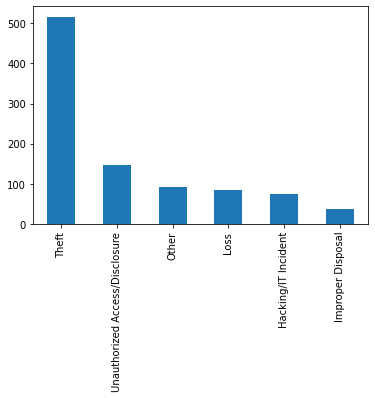

In [227]:
df['Type_of_Breach'].value_counts()[:6].plot(kind = 'bar')

In [228]:
#df['Type_of_Breach'].value_counts()

new_df = df[df['Type_of_Breach'].isin(['Theft', 'Unauthorized Access/Disclosure', 'Other'
, 'Loss', 'Hacking/IT Incident', 'Improper Disposal'])]

df2 = new_df[new_df['Location_of_Breached_Information'].isin(['Other Portable Electronic Device', 'Network Server', 'Other'
, 'Desktop Computer', 'Paper', 'Laptop'])]

df2

,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,breach_start,year
0,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2014-06-30,2009-10-16,2009
1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2014-05-30,2009-09-22,2009
3,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2014-01-23,2009-10-09,2009
4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,2009-09-27,2009
5,"David I. Cohen, MD",CA,857,9/27/2009,Theft,Desktop Computer,2014-01-23,2009-09-27,2009
...,...,...,...,...,...,...,...,...,...
1043,Aetna Life Insurance Company,CT,3814,4/2/2014,Theft,Laptop,2014-06-18,2014-04-02,2014
1046,Mark A. Gillispie,CA,5845,11/20/2013,Theft,Desktop Computer,2014-06-27,2013-11-20,2013
1050,Puerto Rico Health Insurance,PR,28413,9/20/2013,Theft,Other,2014-06-27,2013-09-20,2013
1051,"Hospitalists of Brandon, LLC",FL,1831,2/11/2014,Hacking/IT Incident,Other,2014-06-27,2014-02-11,2014


In [229]:
df2.columns

Index(['Name_of_Covered_Entity', 'State', 'Individuals_Affected',
       'Date_of_Breach', 'Type_of_Breach', 'Location_of_Breached_Information',
       'Date_Posted_or_Updated', 'breach_start', 'year'],
      dtype='object')

In [230]:
# One hot encoding to separate the columns values for analysis

df_encoded = pd.get_dummies(df2, columns = ['Type_of_Breach','Location_of_Breached_Information'])
df_encoded

,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Date_Posted_or_Updated,breach_start,year,Type_of_Breach_Hacking/IT Incident,Type_of_Breach_Improper Disposal,Type_of_Breach_Loss,Type_of_Breach_Other,Type_of_Breach_Theft,Type_of_Breach_Unauthorized Access/Disclosure,Location_of_Breached_Information_Desktop Computer,Location_of_Breached_Information_Laptop,Location_of_Breached_Information_Network Server,Location_of_Breached_Information_Other,Location_of_Breached_Information_Other Portable Electronic Device,Location_of_Breached_Information_Paper
0,Brooke Army Medical Center,TX,1000,10/16/2009,2014-06-30,2009-10-16,2009,0,0,0,0,1,0,0,0,0,0,0,1
1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,2014-05-30,2009-09-22,2009,0,0,0,0,1,0,0,0,1,0,0,0
3,Health Services for Children with Special Need...,DC,3800,10/9/2009,2014-01-23,2009-10-09,2009,0,0,1,0,0,0,0,1,0,0,0,0
4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,2014-01-23,2009-09-27,2009,0,0,0,0,1,0,1,0,0,0,0,0
5,"David I. Cohen, MD",CA,857,9/27/2009,2014-01-23,2009-09-27,2009,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Aetna Life Insurance Company,CT,3814,4/2/2014,2014-06-18,2014-04-02,2014,0,0,0,0,1,0,0,1,0,0,0,0
1046,Mark A. Gillispie,CA,5845,11/20/2013,2014-06-27,2013-11-20,2013,0,0,0,0,1,0,1,0,0,0,0,0
1050,Puerto Rico Health Insurance,PR,28413,9/20/2013,2014-06-27,2013-09-20,2013,0,0,0,0,1,0,0,0,0,1,0,0
1051,"Hospitalists of Brandon, LLC",FL,1831,2/11/2014,2014-06-27,2014-02-11,2014,1,0,0,0,0,0,0,0,0,1,0,0


Coefficient: [3.63642282e-09]
Intercept: 0.5547156250503873


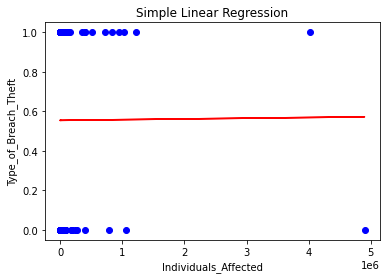

In [236]:
# Prepare the feature (X) and target (Y) variables

X = df_encoded[['Individuals_Affected']]  # Note the double brackets to extract a DataFrame instead of a Series
Y = df_encoded['Type_of_Breach_Theft']

# Create a linear regression model
linear_regressor = LinearRegression()

# Fit the model

linear_regressor.fit(X, Y)

# Make predictions

Y_pred = linear_regressor.predict(X)

# Print the coefficients

print("Coefficient:", linear_regressor.coef_)
print("Intercept:", linear_regressor.intercept_)

# Plot the data and the regression line

plt.scatter(X, Y, color = 'blue')
plt.plot(X, Y_pred, color = 'red')
plt.xlabel('Individuals_Affected')
plt.ylabel('Type_of_Breach_Theft')
plt.title('Simple Linear Regression')
plt.show()

In [238]:
df_encoded.to_csv('data/df_encoded.csv', index = True)